In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


Reading the dataset

In [111]:
df=pd.read_csv("/content/tennis_data.csv")
df=df[0:40]

Seeing the insights of the dataset

In [112]:
df.head()

,Day,Outlook,Temp,Humidity,Wind,Play
0,1,rainy,cool,normal,weak,no
1,2,overcast,mild,normal,weak,no
2,3,rainy,cool,high,strong,yes
3,4,rainy,mild,high,weak,no
4,5,rainy,cool,high,strong,yes


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Day       40 non-null     int64 
 1   Outlook   40 non-null     object
 2   Temp      40 non-null     object
 3   Humidity  40 non-null     object
 4   Wind      40 non-null     object
 5   Play      40 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.0+ KB


In [114]:
df.isnull().sum()

Day         0
Outlook     0
Temp        0
Humidity    0
Wind        0
Play        0
dtype: int64

Calculating Gini Index , Entropy and information gain

In [115]:
# Function to calculate Gini index
def calculate_gini_index(data):
    target_col = data[data.columns[-1]]
    values = target_col.unique()
    gini_index = 1

    for value in values:
        fraction = target_col.value_counts()[value] / len(target_col)
        gini_index -= fraction ** 2

    return gini_index

In [116]:
# Function to calculate entropy
def calculate_entropy(data):
    target_col = data[data.columns[-1]]
    values = target_col.unique()
    entropy = 0

    for value in values:
        fraction = target_col.value_counts()[value] / len(target_col)
        entropy += -fraction * math.log2(fraction)

    return entropy


In [117]:
# Function to calculate information gain
def calculate_information_gain(data, feature):
    entropy_parent = calculate_entropy(data)
    values = data[feature].unique()
    information_gain = entropy_parent

    for value in values:
        subset = data[data[feature] == value]
        fraction = len(subset) / len(data)
        information_gain -= fraction * calculate_entropy(subset)

    return information_gain

In [118]:
# Calculate entropy
entropy = calculate_entropy(df)
print('Entropy:', entropy)

Entropy: 0.99819587904281


In [119]:
# Calculate information gain for each feature
for feature in df.columns[:-1]:
    information_gain = calculate_information_gain(df, feature)
    print('Information Gain for', feature, ':', information_gain)

Information Gain for Day : 0.99819587904281
Information Gain for Outlook : 0.08535542867092477
Information Gain for Temp : 0.01904811003463419
Information Gain for Humidity : 0.04568655412773026
Information Gain for Wind : 0.01633335482157161


In [120]:
# Calculate Gini index
gini_index = calculate_gini_index(df)
print('Gini Index:', gini_index)

Gini Index: 0.49875


Performing label encoding

In [121]:
from sklearn.preprocessing import LabelEncoder
df_encoded=df
le=LabelEncoder()
col=['Day','Outlook','Temp','Humidity','Wind']
for i in col:
  df_encoded[i]=le.fit_transform(df_encoded[i])

In [122]:
df_encoded

,Day,Outlook,Temp,Humidity,Wind,Play
0,0,1,0,1,1,no
1,1,0,2,1,1,no
2,2,1,0,0,0,yes
3,3,1,2,0,1,no
4,4,1,0,0,0,yes
5,5,1,0,1,0,yes
6,6,0,1,1,1,yes
7,7,0,0,0,1,no
8,8,0,0,0,1,no
9,9,2,0,1,1,yes


In [123]:
X=df_encoded.iloc[:,:-1].values
y=df_encoded.iloc[:,-1].values

In [124]:
del df["Play"]
colu=df.columns
colu

Index(['Day', 'Outlook', 'Temp', 'Humidity', 'Wind'], dtype='object')

In [125]:
X

array([[ 0,  1,  0,  1,  1],
       [ 1,  0,  2,  1,  1],
       [ 2,  1,  0,  0,  0],
       [ 3,  1,  2,  0,  1],
       [ 4,  1,  0,  0,  0],
       [ 5,  1,  0,  1,  0],
       [ 6,  0,  1,  1,  1],
       [ 7,  0,  0,  0,  1],
       [ 8,  0,  0,  0,  1],
       [ 9,  2,  0,  1,  1],
       [10,  0,  1,  0,  1],
       [11,  2,  2,  1,  0],
       [12,  0,  1,  0,  0],
       [13,  2,  1,  0,  0],
       [14,  0,  1,  1,  0],
       [15,  1,  2,  1,  1],
       [16,  0,  2,  0,  0],
       [17,  2,  2,  1,  1],
       [18,  0,  1,  1,  1],
       [19,  1,  1,  1,  0],
       [20,  1,  2,  0,  1],
       [21,  1,  2,  0,  1],
       [22,  2,  2,  1,  0],
       [23,  0,  2,  1,  1],
       [24,  2,  2,  0,  0],
       [25,  2,  0,  0,  1],
       [26,  0,  1,  1,  0],
       [27,  0,  1,  1,  1],
       [28,  0,  0,  0,  0],
       [29,  2,  0,  0,  1],
       [30,  2,  0,  1,  0],
       [31,  0,  2,  0,  0],
       [32,  1,  0,  0,  0],
       [33,  2,  0,  0,  0],
       [34,  1

In [126]:
y

array(['no', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes',
       'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes',
       'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no'],
      dtype=object)

Train - Test Split

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

Decision tree model fiting

In [128]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(max_depth=None,random_state=42)
model=classifier.fit(X_train,y_train)

Plotting the Decision tree

[Text(0.6451612903225806, 0.9444444444444444, 'Day <= 30.5\ngini = 0.498\nsamples = 32\nvalue = [17, 15]\nclass = u'),
 Text(0.4838709677419355, 0.8333333333333334, 'Outlook <= 1.5\ngini = 0.486\nsamples = 24\nvalue = [10, 14]\nclass = n'),
 Text(0.3548387096774194, 0.7222222222222222, 'Day <= 22.0\ngini = 0.48\nsamples = 15\nvalue = [9, 6]\nclass = u'),
 Text(0.2903225806451613, 0.6111111111111112, 'Wind <= 0.5\ngini = 0.426\nsamples = 13\nvalue = [9, 4]\nclass = u'),
 Text(0.12903225806451613, 0.5, 'Day <= 9.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = n'),
 Text(0.06451612903225806, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = n'),
 Text(0.1935483870967742, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = u'),
 Text(0.45161290322580644, 0.5, 'Day <= 19.0\ngini = 0.32\nsamples = 10\nvalue = [8, 2]\nclass = u'),
 Text(0.3225806451612903, 0.3888888888888889, 'Humidity <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = u'),


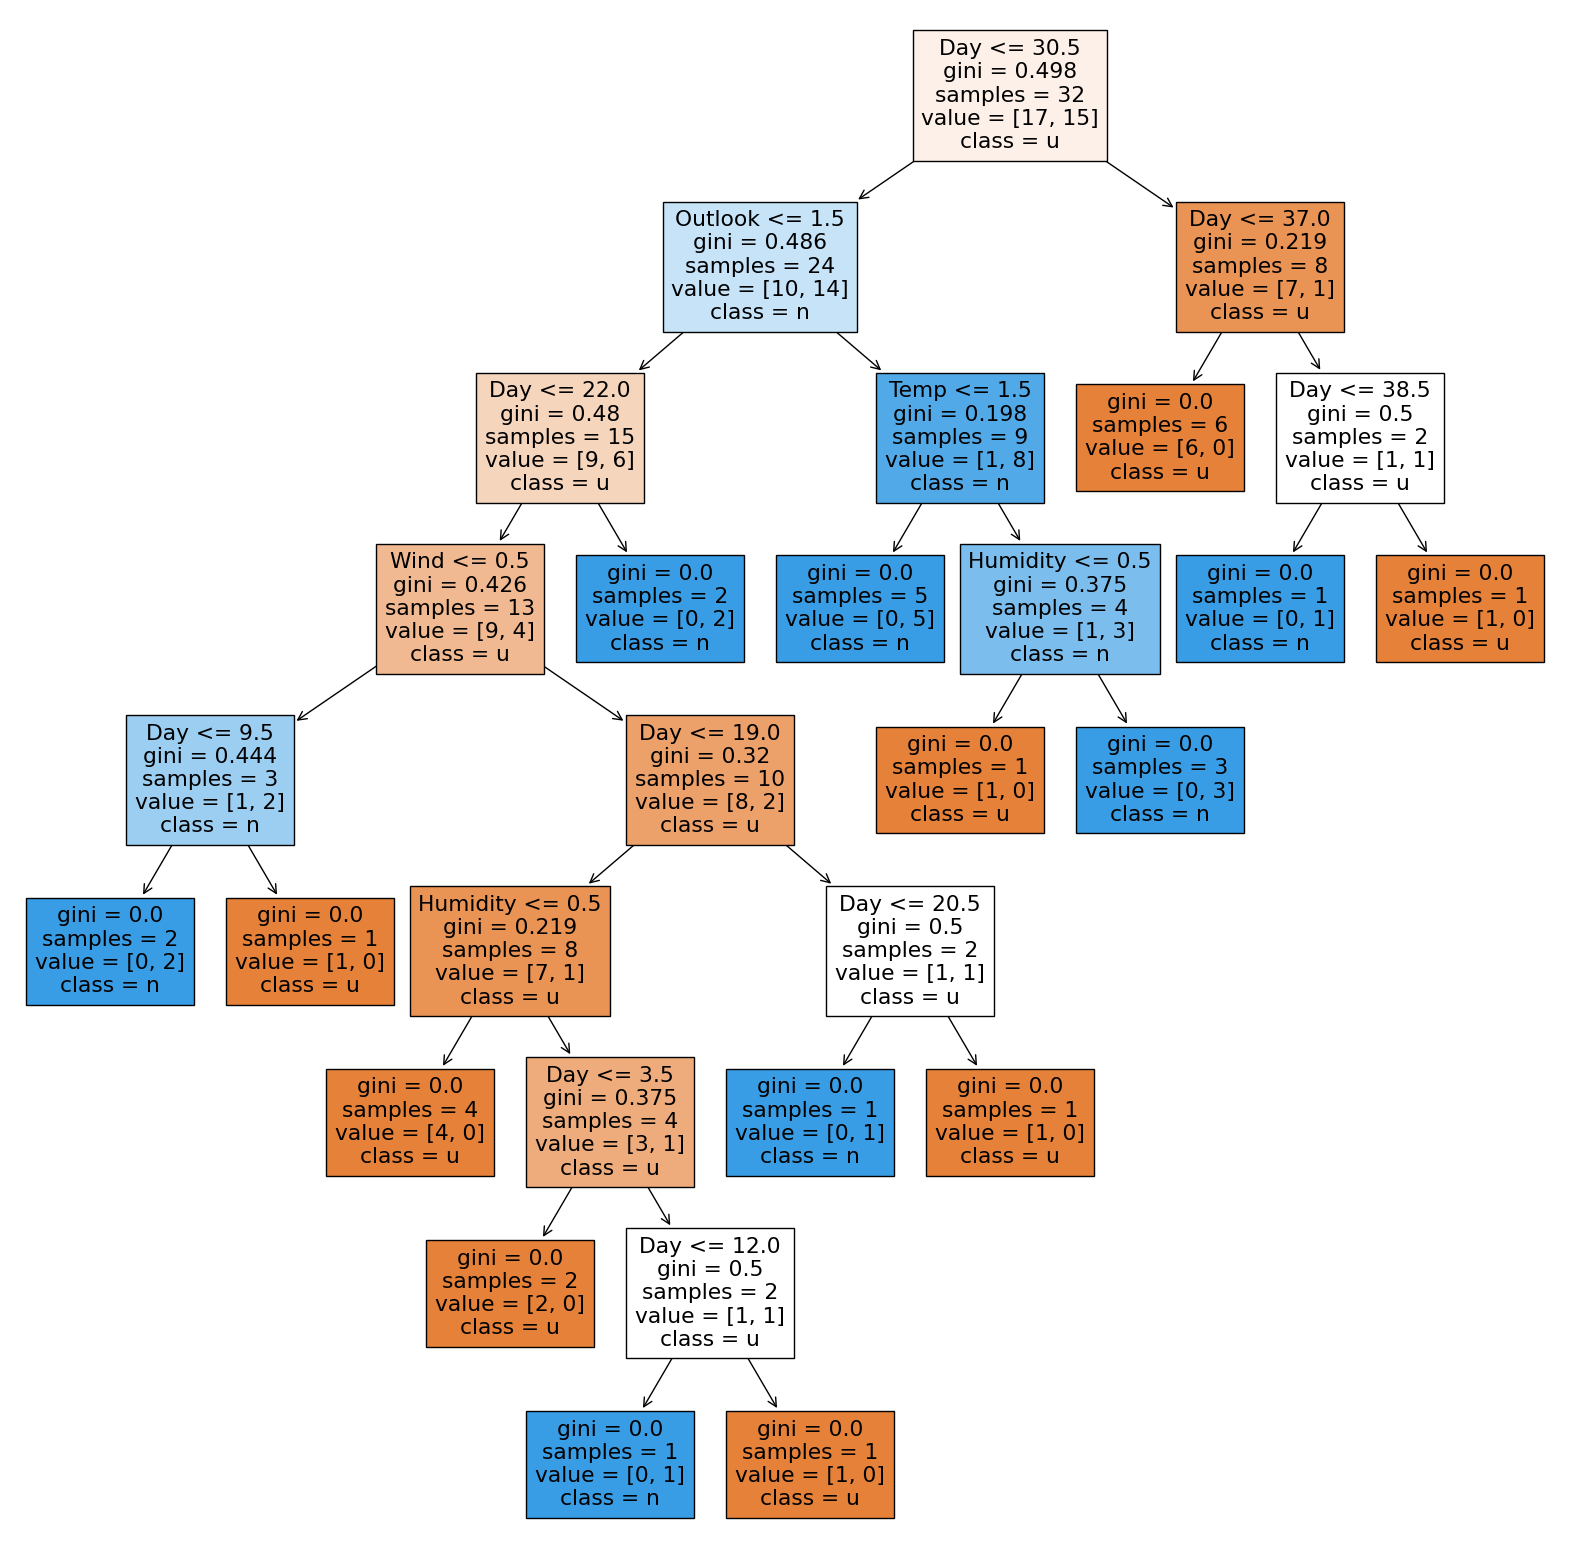

In [129]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(model, feature_names=colu, class_names="uniq", filled=True, ax=ax)

Calculation the accuracy of the Decision Tree

In [130]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"accuracy : {accuracy}")

accuracy : 62.5


Confusion Matrix

In [131]:
confusion_matrix(y_test, y_pred)

array([[3, 1],
       [2, 2]])

Performing Random Forest Classifier

In [132]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [133]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [134]:
y_pred = rf.predict(X_test)

In [135]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.875


In [136]:
x_train=pd.DataFrame(X_train)

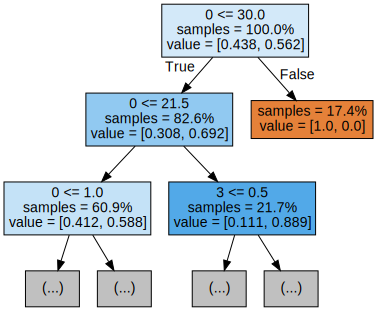

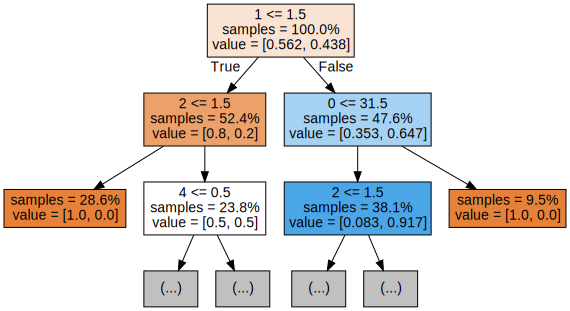

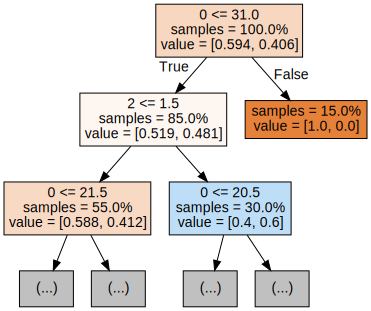

In [137]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)